In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import numpy as np

def DGPFK(grad_f, PK, X0, tau, Nmax, epsilon):
    """
    Implémentation de l'algorithme du Gradient Projeté (Descente de Gradient Projeté).
    
    Arguments :
    - grad_f  : Fonction qui calcule le gradient de f (renvoie un vecteur numpy).
    - PK      : Fonction qui projette un point sur l'ensemble K (renvoie un vecteur numpy).
    - X0      : Point initial (liste ou tableau numpy).
    - tau     : Pas de descente (learning rate), scalaire > 0.
    - Nmax    : Nombre maximal d'itérations (entier).
    - epsilon : Tolérance pour le critère d'arrêt (précision).
    
    Renvoie :
    - X       : La solution approximative (le dernier Xn calculé).
    - iters   : (Optionnel) Liste des points visités pour tracer le graphique plus tard.
    """
    
    # 1. Conversion du point de départ en tableau numpy (vecteur)
    X = np.array(X0, dtype=float)
    
    # On garde en mémoire le chemin parcouru pour la partie graphique 
    iters = [X.copy()]
    
    # 2. Boucle principale
    for k in range(Nmax):
        
        # --- Étape A : Calcul du gradient ---
        g = grad_f(X)
        
        # --- Étape B : Descente (Gradient simple) ---
        # On calcule le point intermédiaire Y = X - tau * gradient
        Y = X - tau * g
        
        # --- Étape C : Projection sur K ---
        # On projette ce point Y sur l'ensemble des contraintes
        X_new = PK(Y)
        
        # --- Étape D : Critère d'arrêt ---
        # Si la distance entre l'ancien et le nouveau point est très petite
        if np.linalg.norm(X_new - X) < epsilon:
            print(f"Convergence atteinte en {k+1} itérations.")
            return X_new, np.array(iters)
        
        # Mise à jour pour l'itération suivante
        X = X_new
        iters.append(X.copy())
        
    # Si on sort de la boucle sans avoir convergé
    print("Attention : Nombre maximal d'itérations atteint.")
    return X, np.array(iters)

In [11]:
# --- 1. Définition du problème ---
def f(X):
    """Fonction coût f(x,y) = x^2 + y^2"""
    return X[0]**2 + X[1]**2

def grad_f(X):
    """Gradient de f : (2x, 2y)"""
    return np.array([2*X[0], 2*X[1]])

def PK(X):
    """Projection sur la droite x + y = 1"""
    x, y = X[0], X[1]
    xp = (1 + x - y) / 2
    yp = (1 - x + y) / 2
    return np.array([xp, yp])


In [12]:
# --- 3. Configuration de l'expérience ---

# Paramètres
tau_valeurs = [0.1, 0.4, 0.9] # Différents pas pour tester
points_depart = [[-2.5, -2.0], [2.5, 2.5], [-2.0, 2.0]]
Nmax = 50
epsilon = 1e-4

# Création de la grille pour les lignes de niveau (contours)
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2

Convergence atteinte en 6 itérations.
Point de départ [-2.5, -2.0] -> Solution trouvée : [0.499984 0.500016], f(sol)=0.500000000512
Convergence atteinte en 2 itérations.
Point de départ [2.5, 2.5] -> Solution trouvée : [0.5 0.5], f(sol)=0.5
Convergence atteinte en 8 itérations.
Point de départ [-2.0, 2.0] -> Solution trouvée : [0.49999488 0.50000512], f(sol)=0.5000000000524288


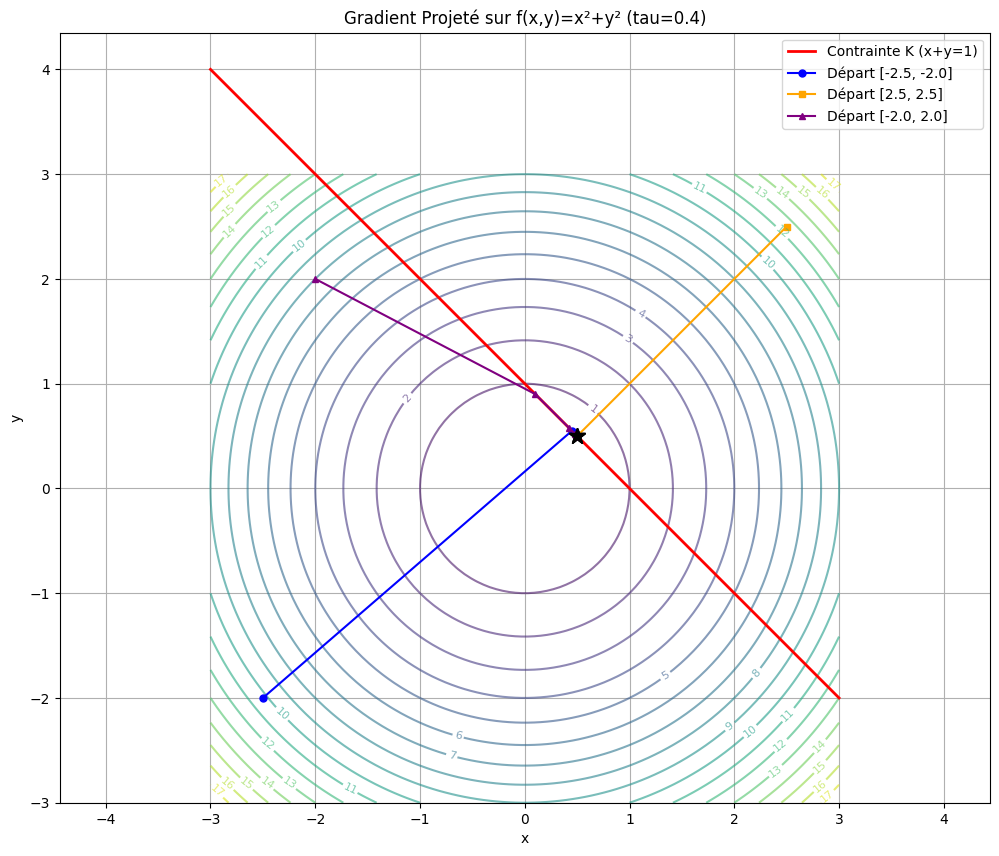

--- Discussion Critères d'arrêt ---
1. Variation de X (||X_{k+1} - X_k|| < eps) : Utilisé ici. Simple, mais peut arrêter trop tôt si la convergence est très lente.
2. Stationnarité (||X - P_K(X - grad f(X))|| < eps) : Plus robuste mathématiquement, mesure à quel point on respecte KKT.


In [14]:
# --- 4. Affichage Graphique ---
plt.figure(figsize=(12, 10))

# A. Tracer les lignes de niveau
contour = plt.contour(X_g, Y_g, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# B. Tracer la contrainte (droite rouge)
plt.plot(x_grid, 1 - x_grid, 'r-', linewidth=2, label='Contrainte K (x+y=1)')

# C. Exécution et tracé des trajectoires
colors = ['blue', 'orange', 'purple']
styles = ['o-', 's-', '^-']

# On teste pour un pas fixe tau = 0.4 (le meilleur théorique est proche de 1/L = 0.5)
tau_choisi = 0.4

for i, X0 in enumerate(points_depart):
    sol, chemin = DGPFK(grad_f, PK, X0, tau_choisi, Nmax, epsilon)
    print(f"Point de départ {X0} -> Solution trouvée : {sol}, f(sol)={f(sol)}")
    # Tracé du chemin
    plt.plot(chemin[:, 0], chemin[:, 1], styles[i], 
                color=colors[i], markersize=5, label=f'Départ {X0}')
    
    # Marquer la fin
    plt.plot(sol[0], sol[1], 'k*', markersize=12) # Etoile noire = solution trouvée

# D. Esthétique
plt.title(f"Gradient Projeté sur f(x,y)=x²+y² (tau={tau_choisi})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal') # Important pour voir l'orthogonalité
plt.grid(True)
plt.show()

# --- Discussion des Critères d'arrêt (dans la console) ---
print("--- Discussion Critères d'arrêt ---")
print("1. Variation de X (||X_{k+1} - X_k|| < eps) : Utilisé ici. Simple, mais peut arrêter trop tôt si la convergence est très lente.")
print("2. Stationnarité (||X - P_K(X - grad f(X))|| < eps) : Plus robuste mathématiquement, mesure à quel point on respecte KKT.")